In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\abc\Data Science and ML\CampusX\Project\self\project_3.csv')

In [3]:
df.sample(2)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
3590,house,eldeco mansionz,sector 48,515.0,18885.0,2722.28,Plot area 303(253.35 sq.m.)Built Up area: 302 ...,NaN,302.0,300.0,...,2.0,East,Moderately Old,NaN,1,0,1,0,0,NaN
2994,house,huda sector-56 gurgaon,sector 56,360.0,24845.0,1452.60,Plot area 161(134.62 sq.m.),NaN,161.0,NaN,...,3.0,North-East,Moderately Old,0.0,0,0,0,0,1,0.0


In [4]:
x=df[df['price_per_sqft_inrs']<20000]
(x['area']/x['bedRoom']).quantile(0.05)

260.01466666666664

In [5]:
df[df['area']/df['bedRoom']<(x['area']/x['bedRoom']).quantile(0.05)].sample(5)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
3171,house,huda housing board colony,sector 31,460.0,31506.0,1463.36,Plot area 1460(135.64 sq.m.),NaN,1460.0,NaN,...,3.0,East,Old Property,0.0,0,0,0,0,1,0.0
2296,flat,signature global solera,sector 107,60.0,8000.0,750.00,Built Up area: 750 (69.68 sq.m.)Carpet area: 6...,NaN,750.0,650.0,...,8.0,NaN,Undefined,1.0,0,0,0,0,0,45.0
3556,house,independent,sector 43,530.0,27390.0,1936.80,Plot area 215(179.77 sq.m.),NaN,215.0,NaN,...,3.0,East,Moderately Old,NaN,1,0,0,0,0,NaN
3048,house,my home,new sector 2,34.0,12592.0,269.00,Plot area 270(25.08 sq.m.),NaN,270.0,NaN,...,3.0,West,Moderately Old,0.0,0,0,0,0,0,15.0
3089,house,independent,sector 7,116.0,11693.0,989.92,Plot area 992(92.16 sq.m.)Carpet area: 992 sq....,NaN,NaN,992.0,...,3.0,North-East,Moderately Old,0.0,0,0,0,0,1,14.0


In [6]:
df=df[df['area']/df['bedRoom']>100]

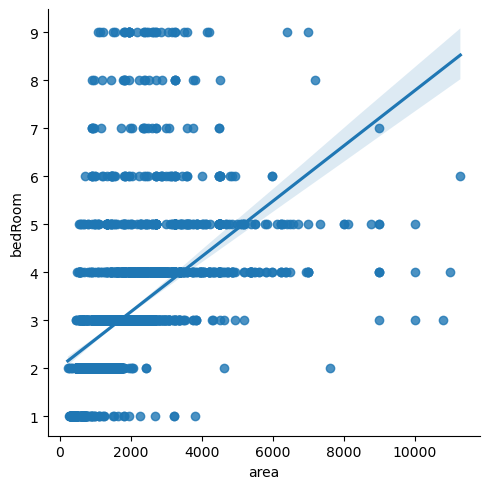

In [7]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [8]:
outlier_bedRoom_df=df[(df['area']/df['bedRoom']<(x['area']/x['bedRoom']).quantile(0.05))&(df['bedRoom']>3)].iloc[:,:15]

In [9]:
outlier_bedRoom_df['bedRoom']=round(outlier_bedRoom_df['bedRoom']/outlier_bedRoom_df['floorNum'])

In [10]:
df.update(outlier_bedRoom_df)

In [11]:
df[(df['area']/df['bedRoom']<250) & (df['bedRoom']>4)].iloc[:,:15].sample(2)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,bedRoom,bathroom,balcony,floorNum,facing
3045,house,independent,sector 7,116.0,11717.0,989.92,Carpet area: 110 (91.97 sq.m.),NaN,NaN,110.0,5,4,2,1.0,North-East
3245,house,independent,sector 2,98.0,9074.0,1076.00,Carpet area: 120 (100.34 sq.m.),NaN,NaN,120.0,9,4,3,1.0,South


In [12]:
df=df[~((df['area']/df['bedRoom']<250) & (df['bedRoom']>4))]

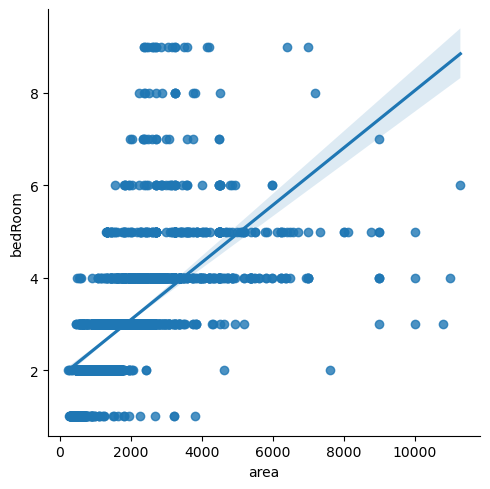

In [13]:
sns.lmplot(data=df,x='area',y='bedRoom')

# Missing Value Imputation

In [14]:
df.shape

(3605, 23)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3605 entries, 0 to 3642
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3605 non-null   object 
 1   society              3604 non-null   object 
 2   sector               3605 non-null   object 
 3   price_in_lacs        3605 non-null   float64
 4   price_per_sqft_inrs  3605 non-null   float64
 5   area                 3605 non-null   float64
 6   areaWithType         3605 non-null   object 
 7   super_builtup        1912 non-null   float64
 8   builtup              1561 non-null   float64
 9   carpet_area          1891 non-null   float64
 10  bedRoom              3605 non-null   int64  
 11  bathroom             3605 non-null   int64  
 12  balcony              3605 non-null   object 
 13  floorNum             3588 non-null   float64
 14  facing               2565 non-null   object 
 15  agePossession        3605 non-null   object

In [16]:
df.describe()

,price_in_lacs,price_per_sqft_inrs,area,super_builtup,builtup,carpet_area,bedRoom,bathroom,floorNum,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
count,3605.000000,3605.000000,3605.000000,1912.000000,1561.000000,1891.000000,3605.000000,3605.000000,3588.000000,3470.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3470.000000
mean,238.834638,11266.326491,1904.554644,1922.111402,1461.925689,1420.451613,3.030236,3.214147,7.010870,0.637176,0.356172,0.185298,0.168100,0.089320,0.107628,73.681844
std,272.867205,7107.303257,1143.820518,767.354966,1236.767880,945.964780,1.135359,1.375289,6.106037,0.898768,0.478933,0.388593,0.374007,0.285245,0.309953,52.594718
min,7.500000,544.000000,225.960000,89.000000,14.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,6761.000000,1251.200000,1457.000000,500.000000,847.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
50%,150.000000,8883.000000,1732.360000,1828.000000,1350.000000,1300.000000,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000
75%,260.000000,13178.000000,2290.080000,2215.000000,1900.000000,1770.000000,4.000000,4.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,111.000000
max,3150.000000,50000.000000,11287.240000,10000.000000,9500.000000,11000.000000,9.000000,12.000000,51.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,174.000000


In [17]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_lacs             0
price_per_sqft_inrs       0
area                      0
areaWithType              0
super_builtup          1693
builtup                2044
carpet_area            1714
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1040
agePossession             0
furnish_type            135
servant_room              0
study room                0
pooja room                0
store_room                0
others                    0
luxury_score            135
dtype: int64

# builtup

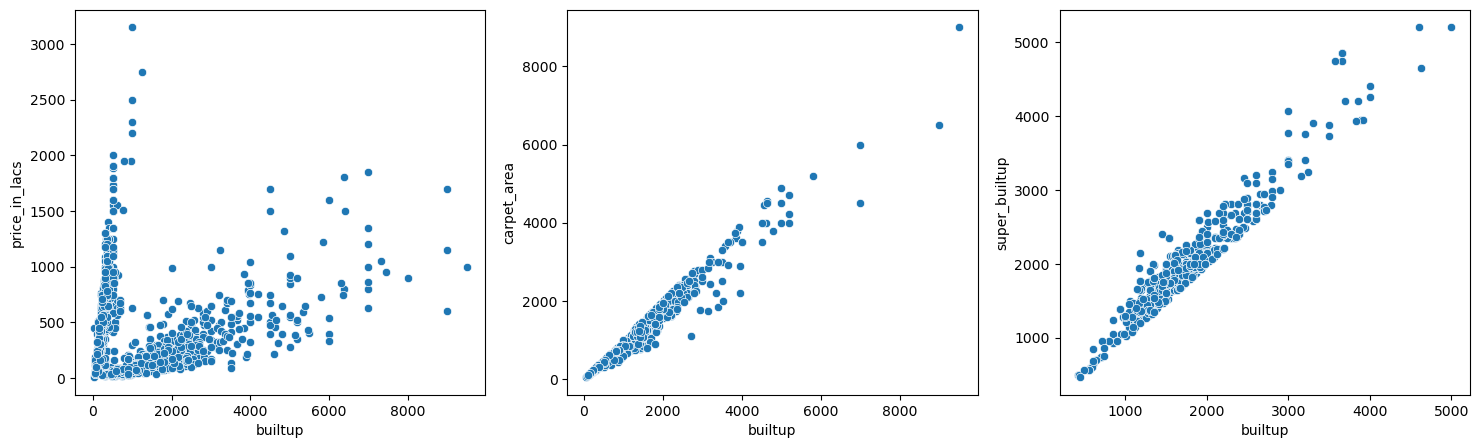

In [18]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x='builtup',y='price_in_lacs',data=df)
plt.subplot(1,3,2)
sns.scatterplot(x='builtup',y='carpet_area',data=df)
plt.subplot(1,3,3)
sns.scatterplot(x='builtup',y='super_builtup',data=df)
plt.show()

In [19]:
((df['builtup'].isnull())&(df['carpet_area'].isnull())&(df['super_builtup'].isnull())).isnull().sum()

0

In [20]:
df[((~df['builtup'].isnull())&(~df['carpet_area'].isnull())&(~df['super_builtup'].isnull()))].sample(5)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
1301,flat,dlf the skycourt,sector 86,158.0,8190.0,1929.18,Super Built up area 1929(179.21 sq.m.)Built Up...,1929.0,1750.0,1450.0,...,16.0,North,Relatively New,0.0,0,0,1,0,0,92.0
1754,flat,antriksh heights,sector 84,90.0,6206.0,1450.21,Super Built up area 1725(160.26 sq.m.)Built Up...,1725.0,1525.0,1450.0,...,12.0,North-East,Relatively New,0.0,0,0,0,0,0,50.0
1161,flat,m3m merlin,sector 67,265.0,12945.0,2047.12,Super Built up area 2047(190.17 sq.m.)Built Up...,2047.0,1900.0,1700.0,...,0.0,North-East,Relatively New,2.0,0,0,0,0,1,146.0
1212,flat,shri banke bihari society,sector 56,135.0,6750.0,2000.00,Super Built up area 2000(185.81 sq.m.)Built Up...,2000.0,1800.0,1600.0,...,5.0,East,Old Property,0.0,0,0,0,0,1,49.0
950,flat,paras dews,sector 106,134.0,9550.0,1403.14,Super Built up area 2355(218.79 sq.m.)Built Up...,2355.0,1535.0,1403.0,...,7.0,South-East,Relatively New,0.0,1,0,0,0,0,107.0


In [21]:
all_present_df=df[(~df['builtup'].isnull())&(~df['carpet_area'].isnull())&(~df['super_builtup'].isnull())]

In [22]:
s_to_b=(all_present_df['super_builtup']/all_present_df['builtup']).median()
s_to_b

1.1048701298701298

In [23]:
s_to_c=(all_present_df['carpet_area']/all_present_df['builtup']).median()
s_to_c

0.900140056022409

In [24]:
only_b=df[(df['builtup'].isnull())&(~df['carpet_area'].isnull())&(~df['super_builtup'].isnull())]
only_b.sample(2)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
104,flat,pareena laxmi apartments,sector 99a,32.0,6106.0,524.07,Super Built up area 524(48.68 sq.m.)Carpet are...,524.0,NaN,424.0,...,2.0,NaN,New Property,0.0,0,0,0,0,0,127.0
2220,flat,eldeco accolade,sohna road,85.0,6724.0,1264.13,Super Built up area 1264(117.43 sq.m.)Carpet a...,1264.0,NaN,730.0,...,10.0,NaN,New Property,1.0,0,0,0,0,0,151.0


In [25]:
only_b['builtup'].fillna(round(((only_b['carpet_area']/s_to_c)+(only_b['super_builtup']/s_to_b))/2),inplace=True)
only_b.sample(2)

C:\Users\abc\AppData\Local\Temp\ipykernel_7600\3028985971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  only_b['builtup'].fillna(round(((only_b['carpet_area']/s_to_c)+(only_b['super_builtup']/s_to_b))/2),inplace=True)
C:\Users\abc\AppData\Local\Temp\ipykernel_7600\3028985971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_b['bui

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
2785,flat,godrej habitat,sector 3,125.0,8656.0,1444.09,Super Built up area 1444(134.15 sq.m.)Carpet a...,1444.0,1161.0,913.0,...,14.0,NaN,Under Construction,0.0,0,0,0,0,0,72.0
462,flat,m3m merlin,sector 67,340.0,14418.0,2358.16,Super Built up area 2358(219.07 sq.m.)Carpet a...,2358.0,2016.0,1708.0,...,16.0,North-West,Relatively New,0.0,1,0,0,0,0,31.0


In [26]:
df.update(only_b)

In [27]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_lacs             0
price_per_sqft_inrs       0
area                      0
areaWithType              0
super_builtup          1693
builtup                1616
carpet_area            1714
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1040
agePossession             0
furnish_type            135
servant_room              0
study room                0
pooja room                0
store_room                0
others                    0
luxury_score            135
dtype: int64

In [28]:
b_and_c=df[(df['builtup'].isnull())&(df['carpet_area'].isnull())&(~df['super_builtup'].isnull())]
b_and_c.sample(2)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
1710,flat,dlf new town heights,sector 86,154.0,5786.0,2661.60,Super Built up area 2364(219.62 sq.m.),2364.0,NaN,NaN,...,21.0,North-West,Moderately Old,2.0,1,1,1,0,0,8.0
570,flat,krrish provence estate,gwal pahari,525.0,9051.0,5800.46,Super Built up area 5800(538.84 sq.m.),5800.0,NaN,NaN,...,2.0,North-East,New Property,0.0,1,1,1,0,0,174.0


In [29]:
b_and_c['builtup'].fillna(round(b_and_c['super_builtup']/s_to_b),inplace=True)
b_and_c.sample(2)

C:\Users\abc\AppData\Local\Temp\ipykernel_7600\3715797606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  b_and_c['builtup'].fillna(round(b_and_c['super_builtup']/s_to_b),inplace=True)
C:\Users\abc\AppData\Local\Temp\ipykernel_7600\3715797606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_and_c['builtup'].fillna(round(b_and_c['super

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
1297,flat,shree vardhman victoria,sector 70,180.0,9230.0,1950.16,Super Built up area 1950(181.16 sq.m.),1950.0,1765.0,NaN,...,10.0,North-East,New Property,0.0,0,0,0,0,1,100.0
1464,flat,godrej,sector 79,134.0,8524.0,1572.03,Super Built up area 1572(146.04 sq.m.),1572.0,1423.0,NaN,...,7.0,East,Relatively New,2.0,0,0,0,0,0,105.0


In [30]:
df.update(b_and_c)

In [31]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_lacs             0
price_per_sqft_inrs       0
area                      0
areaWithType              0
super_builtup          1693
builtup                 716
carpet_area            1714
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1040
agePossession             0
furnish_type            135
servant_room              0
study room                0
pooja room                0
store_room                0
others                    0
luxury_score            135
dtype: int64

In [32]:
b_and_s=df[(df['builtup'].isnull())&(~df['carpet_area'].isnull())&(df['super_builtup'].isnull())]
b_and_s.sample(1)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
2695,flat,oriental valley chs,sector 9a,150.0,9090.0,1650.17,Carpet area: 1650 (153.29 sq.m.),NaN,NaN,1650.0,...,8.0,NaN,Relatively New,0.0,0,0,0,0,0,95.0


In [33]:
b_and_s['builtup'].fillna(round(b_and_s['carpet_area']/s_to_c),inplace=True)
b_and_s.sample(1)

C:\Users\abc\AppData\Local\Temp\ipykernel_7600\3531759573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  b_and_s['builtup'].fillna(round(b_and_s['carpet_area']/s_to_c),inplace=True)
C:\Users\abc\AppData\Local\Temp\ipykernel_7600\3531759573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_and_s['builtup'].fillna(round(b_and_s['carpet_

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
205,flat,vatika sovereign next,sector 82a,385.0,7500.0,5133.33,Carpet area: 5140 (477.52 sq.m.),NaN,5710.0,5140.0,...,6.0,NaN,New Property,0.0,1,0,1,0,0,126.0


In [34]:
df.update(b_and_s)

In [35]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_lacs             0
price_per_sqft_inrs       0
area                      0
areaWithType              0
super_builtup          1693
builtup                   2
carpet_area            1714
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1040
agePossession             0
furnish_type            135
servant_room              0
study room                0
pooja room                0
store_room                0
others                    0
luxury_score            135
dtype: int64

In [36]:
df[df['builtup'].isnull()]

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
3122,house,independent,sector 39,515.0,14072.0,3658.4,Built Up area: 340,NaN,NaN,NaN,...,1.0,NaN,Relatively New,0.0,0,0,0,0,0,0.0
3308,house,independent,sector 4,55.0,6813.0,807.0,Built Up area: 75,NaN,NaN,NaN,...,1.0,NaN,Moderately Old,2.0,0,0,0,0,0,130.0


In [37]:
df.loc[3122,'builtup']=340
df.loc[3308,'builtup']=75

In [38]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_lacs             0
price_per_sqft_inrs       0
area                      0
areaWithType              0
super_builtup          1693
builtup                   0
carpet_area            1714
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1040
agePossession             0
furnish_type            135
servant_room              0
study room                0
pooja room                0
store_room                0
others                    0
luxury_score            135
dtype: int64

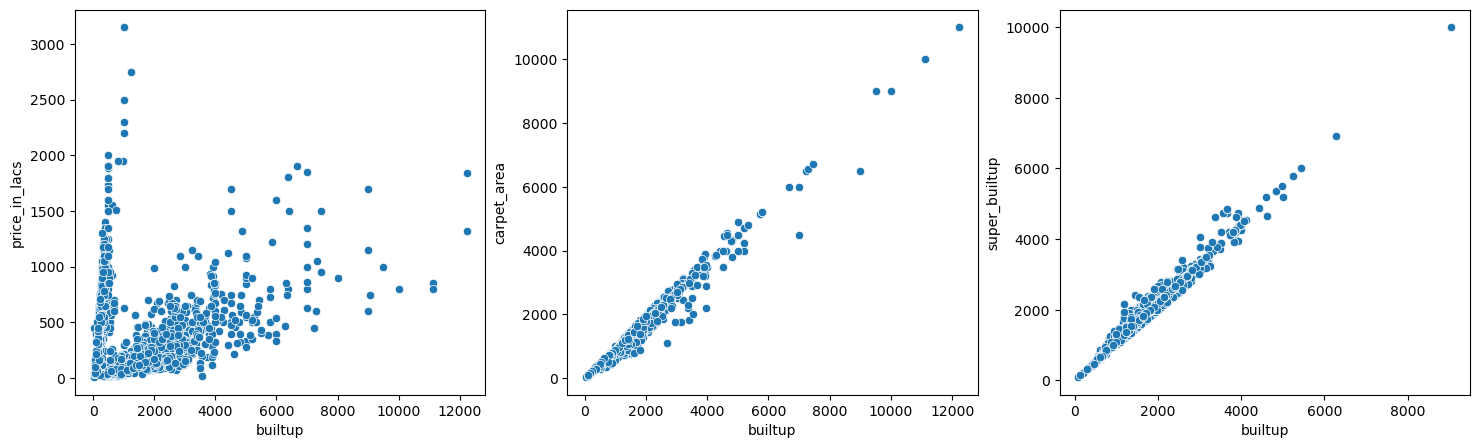

In [39]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x='builtup',y='price_in_lacs',data=df)
plt.subplot(1,3,2)
sns.scatterplot(x='builtup',y='carpet_area',data=df)
plt.subplot(1,3,3)
sns.scatterplot(x='builtup',y='super_builtup',data=df)
plt.show()

In [40]:
anamoly_df=df[(df['builtup']<2000)&(df['price_in_lacs']>250)][['price_in_lacs','area','builtup']]

In [41]:
anamoly_df['builtup']=anamoly_df['area']

In [42]:
anamoly_df.shape

(467, 3)

In [43]:
df.update(anamoly_df)

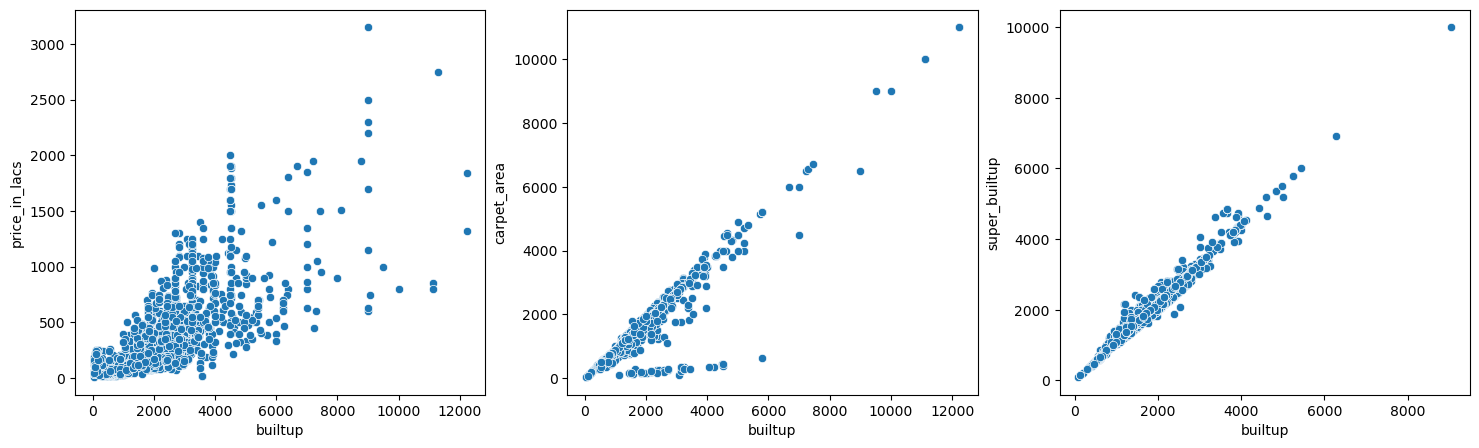

In [44]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x='builtup',y='price_in_lacs',data=df)
plt.subplot(1,3,2)
sns.scatterplot(x='builtup',y='carpet_area',data=df)
plt.subplot(1,3,3)
sns.scatterplot(x='builtup',y='super_builtup',data=df)
plt.show()

In [45]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_lacs',
       'price_per_sqft_inrs', 'area', 'areaWithType', 'super_builtup',
       'builtup', 'carpet_area', 'bedRoom', 'bathroom', 'balcony', 'floorNum',
       'facing', 'agePossession', 'furnish_type', 'servant_room', 'study room',
       'pooja room', 'store_room', 'others', 'luxury_score'],
      dtype='object')

In [46]:
df.drop(columns=['area','areaWithType','super_builtup','carpet_area'],inplace=True)

In [47]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_lacs             0
price_per_sqft_inrs       0
builtup                   0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1040
agePossession             0
furnish_type            135
servant_room              0
study room                0
pooja room                0
store_room                0
others                    0
luxury_score            135
dtype: int64

# floorNum

In [48]:
df[df['floorNum'].isnull()].sample(5)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,builtup,bedRoom,bathroom,balcony,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
3019,house,independent,sector 24,145.0,26852.0,60.00,3,3,1,NaN,NaN,Old Property,0.0,0,0,0,0,0,0.0
2953,house,independent,sector 2,560.0,17284.0,3238.76,8,6,3+,NaN,South-West,Moderately Old,1.0,1,1,1,1,0,20.0
3053,house,independent,sector 3,150.0,10288.0,210.00,3,3,0,NaN,NaN,Old Property,0.0,0,0,0,0,0,0.0
169,flat,experion heartsong,dwarka expressway,108.0,6150.0,1758.00,3,3,0,NaN,NaN,Under Construction,0.0,0,0,0,0,0,38.0
3127,house,ansal sushant lok plots,sector 43,330.0,26570.0,1237.40,1,1,0,NaN,NaN,Under Construction,0.0,0,0,0,0,0,0.0


In [49]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [50]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_7600\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [51]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_lacs             0
price_per_sqft_inrs       0
builtup                   0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
facing                 1040
agePossession             0
furnish_type            135
servant_room              0
study room                0
pooja room                0
store_room                0
others                    0
luxury_score            135
dtype: int64

# facing

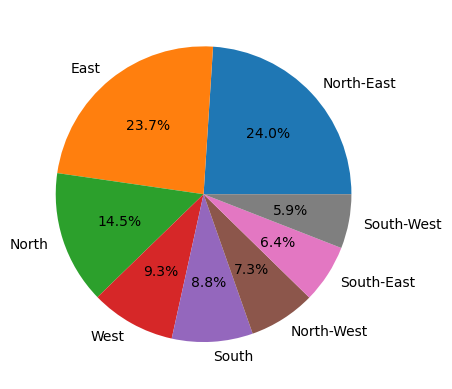

In [52]:
x=df['facing'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%0.1f%%')
plt.show()

In [53]:
df.drop(columns=['facing'],inplace=True)

In [54]:
df.isnull().sum()

property_type            0
society                  1
sector                   0
price_in_lacs            0
price_per_sqft_inrs      0
builtup                  0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
agePossession            0
furnish_type           135
servant_room             0
study room               0
pooja room               0
store_room               0
others                   0
luxury_score           135
dtype: int64

In [55]:
df[df['society'].isnull()]

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,builtup,bedRoom,bathroom,balcony,floorNum,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
2689,flat,NaN,sector 78,60.0,3692.0,1625.0,2,2,0,2.0,Under Construction,0.0,0,0,0,0,0,31.0


In [56]:
df.drop(index=[2689],inplace=True)

In [57]:
df.isnull().sum()

property_type            0
society                  0
sector                   0
price_in_lacs            0
price_per_sqft_inrs      0
builtup                  0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
agePossession            0
furnish_type           135
servant_room             0
study room               0
pooja room               0
store_room               0
others                   0
luxury_score           135
dtype: int64

# furnish_type

In [58]:
df['furnish_type'].value_counts()

furnish_type
0.0    2258
2.0    1000
1.0     211
Name: count, dtype: int64

In [59]:
df['furnish_type'][df['furnish_type'].isnull()]=0

C:\Users\abc\AppData\Local\Temp\ipykernel_7600\3861046051.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['furnish_type'][df['furnish_type'].isnull()]=0
C:\Users\abc\AppData\Local\Temp\ipykernel_7600\3861046051.py:1: SettingWithCopyWa

In [60]:
df.isnull().sum()

property_type            0
society                  0
sector                   0
price_in_lacs            0
price_per_sqft_inrs      0
builtup                  0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
agePossession            0
furnish_type             0
servant_room             0
study room               0
pooja room               0
store_room               0
others                   0
luxury_score           135
dtype: int64

# luxury_score

In [61]:
df['luxury_score'][df['luxury_score'].isnull()]=0

C:\Users\abc\AppData\Local\Temp\ipykernel_7600\1913328011.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['luxury_score'][df['luxury_score'].isnull()]=0
C:\Users\abc\AppData\Local\Temp\ipykernel_7600\1913328011.py:1: SettingWithCopyWa

In [62]:
df.isnull().sum()

property_type          0
society                0
sector                 0
price_in_lacs          0
price_per_sqft_inrs    0
builtup                0
bedRoom                0
bathroom               0
balcony                0
floorNum               0
agePossession          0
furnish_type           0
servant_room           0
study room             0
pooja room             0
store_room             0
others                 0
luxury_score           0
dtype: int64

# agePossession

In [63]:
df['agePossession'].value_counts()

agePossession
Relatively New        1620
New Property           585
Moderately Old         544
Undefined              296
Old Property           281
Under Construction     278
Name: count, dtype: int64

In [64]:
def agePossession(row):
    if row['agePossession']=='Undefined':
        mode_value=df[(df['sector']==row['sector']) & (df['property_type']==row['property_type'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [65]:
df['agePossession']=df.apply(agePossession,axis=1)

In [66]:
df['agePossession'].value_counts()

agePossession
Relatively New        1747
New Property           627
Moderately Old         583
Old Property           299
Under Construction     293
Undefined               55
Name: count, dtype: int64

In [67]:
def agePossession2(row):
    if row['agePossession']=='Undefined':
        mode_value=df[(df['sector']==row['sector'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [68]:
df['agePossession']=df.apply(agePossession2,axis=1)

In [69]:
df['agePossession'].value_counts()

agePossession
Relatively New        1763
New Property           628
Moderately Old         587
Old Property           301
Under Construction     293
Undefined               32
Name: count, dtype: int64

In [70]:
def agePossession3(row):
    if row['agePossession']=='Undefined':
        mode_value=df[(df['property_type']==row['property_type'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [71]:
df['agePossession']=df.apply(agePossession3,axis=1)

In [72]:
df['agePossession'].value_counts()

agePossession
Relatively New        1773
New Property           628
Moderately Old         609
Old Property           301
Under Construction     293
Name: count, dtype: int64

In [73]:
df.isnull().sum()

property_type          0
society                0
sector                 0
price_in_lacs          0
price_per_sqft_inrs    0
builtup                0
bedRoom                0
bathroom               0
balcony                0
floorNum               0
agePossession          0
furnish_type           0
servant_room           0
study room             0
pooja room             0
store_room             0
others                 0
luxury_score           0
dtype: int64

In [74]:
df.shape

(3604, 18)

In [75]:
df.to_csv(r'C:\Users\abc\Data Science and ML\CampusX\Project\self\project_4.csv',index=False)